In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


*   Uses a CNN
*   Checking prediction quality with a confusion matrix


### Load Data

In [ ]:
# import cifar 10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(f'{train_images.shape = }')
print(f'{test_images.shape = }')

# what are the labels ?
label_classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']


170498071/170498071 [==============================] - 15s 0us/step
train_images.shape = (50000, 32, 32, 3)
test_images.shape = (10000, 32, 32, 3)


#### Visualize

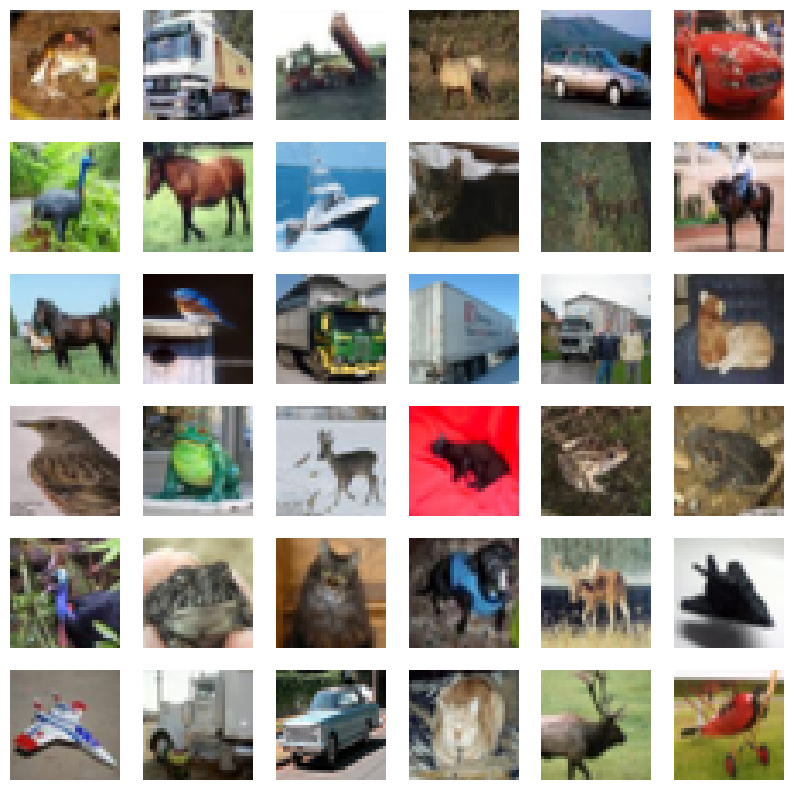

In [ ]:
# look at some of them

fig,ax = plt.subplots(6,6,figsize=(10,10))

idx = 0
for _r in range(6):
    for _c in range(6):
        ax[_r][_c].imshow(train_images[idx])
        ax[_r][_c].axis('off')
        idx += 1

Text(0.5, 1.0, 'sample balance')

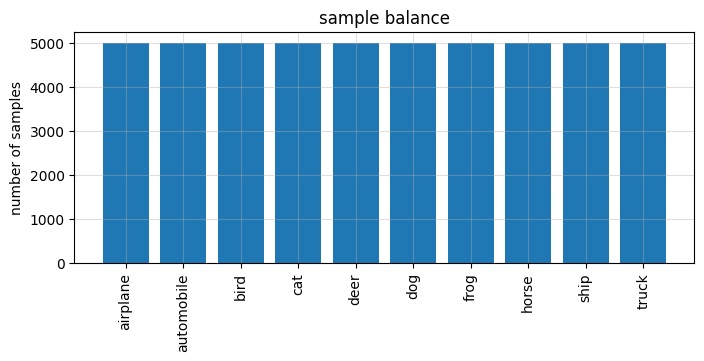

In [ ]:
# how balanced is the data?
unique_labels, label_counts = np.unique(train_labels, return_counts=True)

plt.figure(figsize=(8,3))
plt.bar(unique_labels, label_counts)
plt.xticks(np.arange(10), label_classes, rotation=90)
plt.grid(alpha=0.4)
plt.ylabel('number of samples')
plt.title('sample balance')

#### Preprocess Data

In [ ]:
# convert the outputs to "one hot encoding"

train_ohe = np.zeros((len(train_labels),len(label_classes)))
for idx, _label in enumerate(train_labels):
    train_ohe[idx][_label] = 1

test_ohe = np.zeros((len(test_labels),len(label_classes)))
for idx, _label in enumerate(test_labels):
    test_ohe[idx][_label] = 1

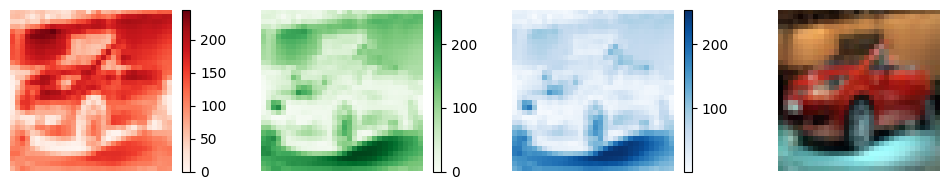

In [ ]:
# blow up a sample into channels (just visualization)
si = 45 # sample index

fig,ax = plt.subplots(1,4,figsize=(10,2))
for i, _cmap in enumerate(['Reds','Greens','Blues']):
    panel = ax[i].imshow(train_images[si,:,:,i], cmap=_cmap)
    plt.colorbar(panel,ax=ax[i])
    ax[i].axis('off')
ax[3].imshow(train_images[si])
ax[3].axis('off')
plt.tight_layout()

# since these values go up to 255, need to normalize before training the NN.
# this will be done right at the input of the NN

### Define the Model

In [ ]:
#

def build_simple_cnn():
    xin = tf.keras.layers.Input((32,32,3))

    x0 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(xin)
    x0 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x0)
    x0 = tf.keras.layers.MaxPooling2D()(x0) # 16x16

    x0 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x0)
    x0 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x0)
    x0 = tf.keras.layers.MaxPooling2D()(x0) # 8x8

    #x0 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(x0)
    #x0 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(x0)
    #x0 = tf.keras.layers.MaxPooling2D()(x0) # 4x4

    x0 = tf.keras.layers.Flatten()(x0)
    x0 = tf.keras.layers.Dense(128, activation='relu')(x0)
    x0 = tf.keras.layers.Dropout(0.4)(x0) # < randomly turns off neurons from the previous layer during training
    xout = tf.keras.layers.Dense(10, activation='softmax')(x0)
    return tf.keras.models.Model(xin, xout)
    # ~0.5 million params

build_simple_cnn().summary() # get a summary of the model


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_simple_cnn_sequential():
    model = tf.keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(MaxPooling2D())

    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(MaxPooling2D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        9248      
                                                           

### Train the model

Epoch 1/40
186/186 [==============================] - 5s 17ms/step - loss: 1.7126 - acc: 0.3767 - val_loss: 1.3877 - val_acc: 0.5008
Epoch 2/40
186/186 [==============================] - 3s 14ms/step - loss: 1.3178 - acc: 0.5266 - val_loss: 1.1638 - val_acc: 0.5984
Epoch 3/40
186/186 [==============================] - 3s 14ms/step - loss: 1.1420 - acc: 0.5942 - val_loss: 1.0240 - val_acc: 0.6432
Epoch 4/40
186/186 [==============================] - 3s 14ms/step - loss: 1.0227 - acc: 0.6402 - val_loss: 0.9375 - val_acc: 0.6784
Epoch 5/40
186/186 [==============================] - 3s 15ms/step - loss: 0.9452 - acc: 0.6676 - val_loss: 0.8620 - val_acc: 0.7092
Epoch 6/40
186/186 [==============================] - 3s 14ms/step - loss: 0.8649 - acc: 0.6953 - val_loss: 0.8477 - val_acc: 0.7144
Epoch 7/40
186/186 [==============================] - 3s 14ms/step - loss: 0.8106 - acc: 0.7153 - val_loss: 0.7979 - val_acc: 0.7328
Epoch 8/40
186/186 [==============================] - 3s 14ms/step - 

Text(0, 0.5, 'acc')

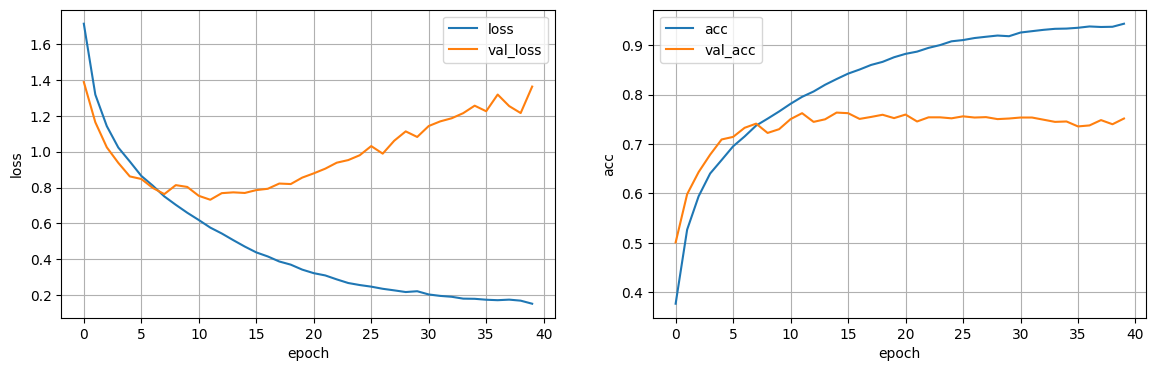

In [ ]:
model = build_simple_cnn()
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['acc'])

# train and plot # gpu, 100 epoch takes ~15 minutes
history = model.fit(train_images/255,
                    train_ohe,
                    batch_size=256,
                    epochs=40,
                    validation_split=0.05,
                    verbose=1)



# plot learning rate curve and accuracy curve
fig,ax = plt.subplots(1,2,figsize=(14,4))

ax[0].plot(history.history['loss'],label='loss')
ax[0].plot(history.history['val_loss'],label='val_loss')

ax[1].plot(history.history['acc'],label='acc')
ax[1].plot(history.history['val_acc'],label='val_acc')
for i in range(2):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].set_ylabel('acc')


### Evaluate

#### Predict on test set images

313/313 [==============================] - 1s 2ms/step


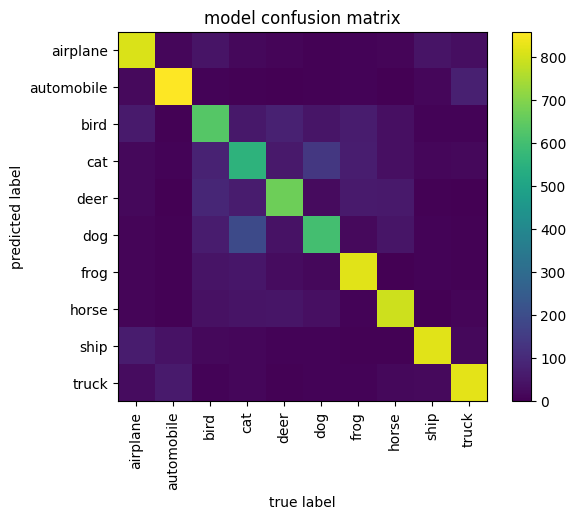

In [ ]:
# make prediction on test data (with same scaling as during training)
pred_labels_raw = model.predict(test_images/255)

# the model doesn't directly predict the class
# it outputs a vector of 10 elements that sums to 1
# we take the maximum element to indicate which class the model thinks it is
pred_labels = pred_labels_raw.argmax(axis=1)

# when the model predicts the wrong class, we can look at what the model thought was the best class
# (ie, where is it "confused").
plt.imshow(confusion_matrix(test_labels, pred_labels))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.colorbar()
plt.title('model confusion matrix')
plt.xticks(np.arange(10), label_classes, rotation=90)
plt.yticks(np.arange(10), label_classes);

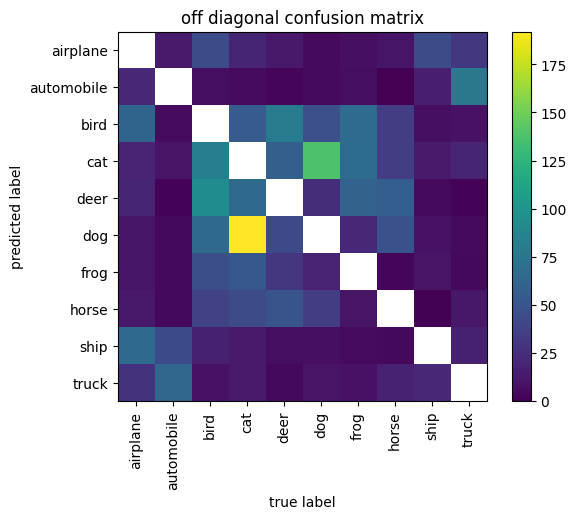

In [ ]:
# look at off-diagonal confusion matrix entries to focus on errors

# prepare a mask, zeros on diagonal, ones everywhere else.
temp_array = np.ones((10,10))
for i in range(10):
  temp_array[i][i] = np.nan

plt.imshow(confusion_matrix(test_labels, pred_labels) * temp_array)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('off diagonal confusion matrix')

plt.colorbar()
plt.xticks(np.arange(10), label_classes, rotation=90)
plt.yticks(np.arange(10), label_classes);

In [ ]:
# final prediction accuracy
eval_out = model.evaluate(test_images/255, test_ohe)
print(f'loss: {eval_out[0]}')
print(f'acc:  {eval_out[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4004 - acc: 0.7379
loss: 1.4003599882125854
acc:  0.7379000186920166


#### Investigate errror

In [ ]:
# look at some cats that are misclassified as dogs

# make two masks for the test set samples.
# the first mask looks for samples that ARE cats
# the second mask looks at samples the model thinks are dogs
true_mask = (test_labels == 3).squeeze()
pred_mask = (pred_labels == 5).squeeze() # squeeze removes axes that are 1s

 # find the intersection where prediction is dog but true label is cat
total_mask = (true_mask * pred_mask)

# pull out indices
misclassified_indices = np.argwhere(total_mask).squeeze()

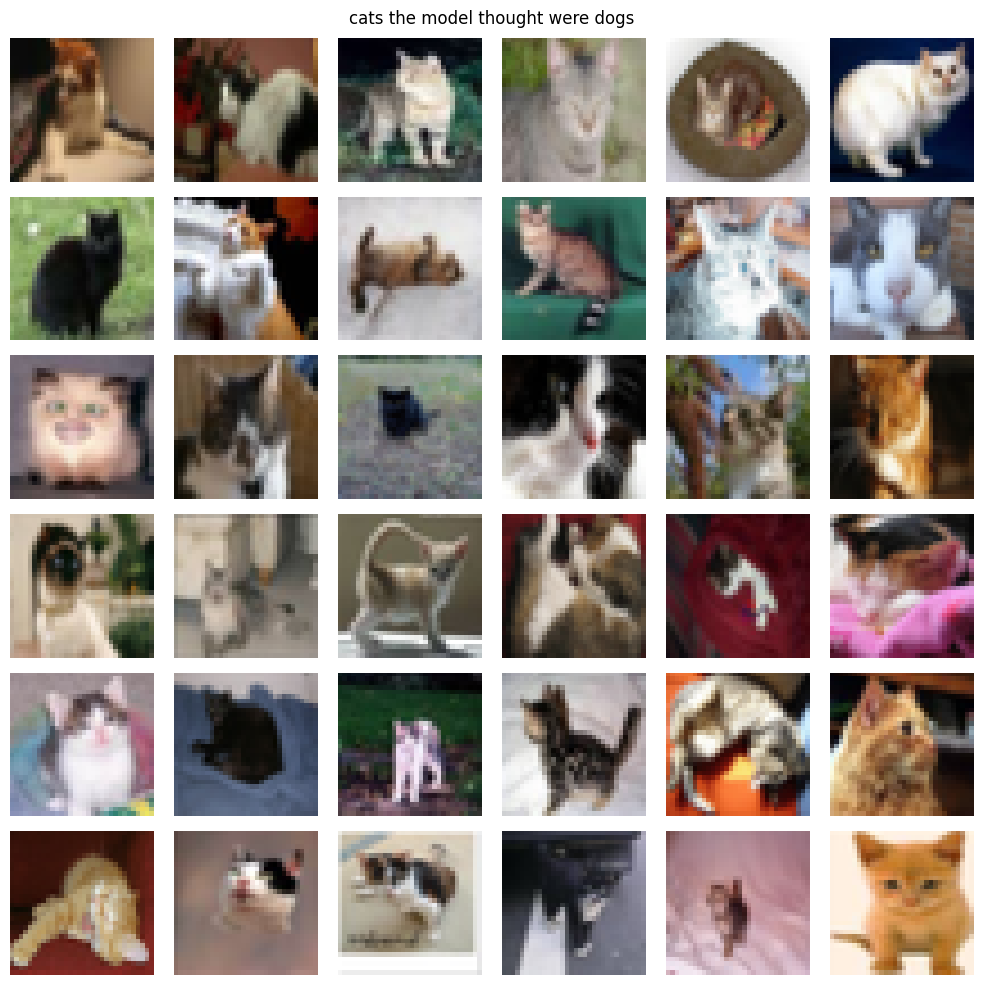

In [ ]:
# plot those misclassified
fig,ax = plt.subplots(6,6,figsize=(10,10))
fig.suptitle('cats the model thought were dogs')
idx = 0
for _r in range(6):
    for _c in range(6):
        ax[_r][_c].imshow(test_images[misclassified_indices[idx]])
        ax[_r][_c].axis('off')
        idx += 1
plt.tight_layout()